In [1]:
#import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import imblearn
#!{sys.executable} -m pip install keras

# Preprocessing

In [2]:
"""
    Based on the training data given, we are able to extract 7 attributes:
    1. x accelerometer measurement
    2. y accelerometer measurement
    3. z accelerometer measurement
    4. x gyroscope measurement
    5. y gyroscope measurement
    6. z gyroscope measurement
    7. time stamp for accelerometer and gyroscope measures
    
    We start by creating a dataframe using the csv files provided for readability.
    
    @param x_file: contains the xyz accelerometers and xyz gyroscope measures from the lower limb
    @param x_time_file: contain the time stamps for the accelerometer and gyroscope measures
    @return dataframe of 7 attributes mentioned
"""
def create_dataframe_X(x_file, x_time_file):
    df1 = pd.read_csv(x_file, sep = ',', names = ['X_acc', 'Y_acc', 'Z_acc', 'X_gyr', 'Y_gyr', 'Z_gyr'])
    df2 = pd.read_csv(x_time_file, names = ['Time stamp'])
    frames = [df1, df2]
    result = pd.concat(frames, axis = 1)
    return result
    
"""
    We have both the labels and the time stamps for the labels. We create a dataframe from these for
    readability.
    
    @param y_file: contain the labels: 
        (0) indicates standing or walking in solid ground, 
        (1) indicates going down the stairs, 
        (2) indicates going up the stairs, and 
        (3) indicates walking on grass
    @param y_time_file: contain the time stamps for the labels
    @return dataframe of labels and time stamps
""" 
def create_dataframe_Y(y_file, y_time_file):
    df1 = pd.read_csv(y_file, names = ['Label'])
    df2 = pd.read_csv(y_time_file, names = ['Time stamp'])
    frames = [df1, df2]
    result = pd.concat(frames, axis = 1)
    return result
    
"""
    We take the outputs of create_dataframe_X and create_dataframe_Y. In order to combine both of these
    dataframes, we need look at the time intervals present for when the labels were assigned. The goal is
    to return a dataframe that now has an eighth column in addition to the seven columns from the dataframe
    from create_dataframe_X. Additionally, we know that x_frame contains more values than y_frame. We want to
    map these labels accordingly. In the end, we drop data points that have missing values.
    
    @param x_frame: dataframe from create_dataframe_X
    @param y_frame: dataframe from create_dataframe_Y
    @return dataframe with 8 columns (7 attributes and label)
"""
def combine_frames(x_frame, y_frame):
    # Change each dataframe column to a list for iterations
    labels = y_frame['Label'].tolist()
    time_stamp_y = y_frame['Time stamp'].tolist()
    time_stamp_x = x_frame['Time stamp'].tolist()
    
    labels_for_x = [] # Create empty list to gather corresponding labels for x_frame
    count = 0
    for i in range(0, len(time_stamp_y)):
        while (time_stamp_x[count] <= time_stamp_y[i]) and (count <= len(time_stamp_x)):
            labels_for_x.append(labels[i])
            count += 1
        continue
    
    # Concatenate the dataframes
    label_df = pd.DataFrame(labels_for_x, columns = ['Label']) # Convert list back to data frame
    combined_frame = pd.concat([x_frame, label_df], axis = 1)
    
    # Drop missing values at the end
    combined_frame = combined_frame.dropna()
    
    # Drop 'Time stamp' column
    combined_frame = combined_frame.drop(columns = ['Time stamp'])
    return combined_frame

In [3]:
x = create_dataframe_X('TrainingData/subject_001_02__x.csv', 'TrainingData/subject_001_02__x_time.csv')
y = create_dataframe_Y('TrainingData/subject_001_02__y.csv', 'TrainingData/subject_001_02__y_time.csv')
combined = combine_frames(x, y)
print(combined)

          X_acc     Y_acc     Z_acc     X_gyr     Y_gyr     Z_gyr  Label
0      1.726654  9.619981  1.723327 -0.001997  0.067502  0.126057    0.0
1      2.225759  9.493385  1.782374  0.008557  0.029333  0.073573    0.0
2      2.010621  9.481603  1.770000 -0.004651  0.001009  0.062978    0.0
3      1.614272  9.516440  1.798932  0.009519  0.024405  0.032554    0.0
4      1.862582  9.353709  1.722649  0.007902  0.022794  0.020837    0.0
...         ...       ...       ...       ...       ...       ...    ...
70164  3.704972  8.586173  3.088743 -0.010505  0.009598 -0.004949    0.0
70165  3.690854  8.759488  3.099146 -0.002501  0.001989  0.001526    0.0
70166  3.939186  8.407883  3.049837  0.015672  0.011588  0.014313    0.0
70167  3.762566  8.168921  3.062974  0.015675  0.007165  0.019624    0.0
70168  3.729076  8.256303  3.034621 -0.005977  0.006976  0.006051    0.0

[70169 rows x 7 columns]


In [4]:
"""
    Generating data frames from training data.
"""
# Subject_001_01
df_x_1_1 = create_dataframe_X('TrainingData/subject_001_01__x.csv', 'TrainingData/subject_001_01__x_time.csv')
df_y_1_1 = create_dataframe_Y('TrainingData/subject_001_01__y.csv', 'TrainingData/subject_001_01__y_time.csv')
frame_1_1 = combine_frames(df_x_1_1, df_y_1_1)

# Subject_001_02
df_x_1_2 = create_dataframe_X('TrainingData/subject_001_02__x.csv', 'TrainingData/subject_001_02__x_time.csv')
df_y_1_2 = create_dataframe_Y('TrainingData/subject_001_02__y.csv', 'TrainingData/subject_001_02__y_time.csv')
frame_1_2 = combine_frames(df_x_1_2, df_y_1_2)

# Subject_001_03
df_x_1_3 = create_dataframe_X('TrainingData/subject_001_03__x.csv', 'TrainingData/subject_001_03__x_time.csv')
df_y_1_3 = create_dataframe_Y('TrainingData/subject_001_03__y.csv', 'TrainingData/subject_001_03__y_time.csv')
frame_1_3 = combine_frames(df_x_1_3, df_y_1_3)

# Subject_001_04
df_x_1_4 = create_dataframe_X('TrainingData/subject_001_04__x.csv', 'TrainingData/subject_001_04__x_time.csv')
df_y_1_4 = create_dataframe_Y('TrainingData/subject_001_04__y.csv', 'TrainingData/subject_001_04__y_time.csv')
frame_1_4 = combine_frames(df_x_1_4, df_y_1_4)

# Subject_001_05
df_x_1_5 = create_dataframe_X('TrainingData/subject_001_05__x.csv', 'TrainingData/subject_001_05__x_time.csv')
df_y_1_5 = create_dataframe_Y('TrainingData/subject_001_05__y.csv', 'TrainingData/subject_001_05__y_time.csv')
frame_1_5 = combine_frames(df_x_1_5, df_y_1_5)

# Subject_001_06
df_x_1_6 = create_dataframe_X('TrainingData/subject_001_06__x.csv', 'TrainingData/subject_001_06__x_time.csv')
df_y_1_6 = create_dataframe_Y('TrainingData/subject_001_06__y.csv', 'TrainingData/subject_001_06__y_time.csv')
frame_1_6 = combine_frames(df_x_1_6, df_y_1_6)

# Subject_001_07
df_x_1_7 = create_dataframe_X('TrainingData/subject_001_07__x.csv', 'TrainingData/subject_001_07__x_time.csv')
df_y_1_7 = create_dataframe_Y('TrainingData/subject_001_07__y.csv', 'TrainingData/subject_001_07__y_time.csv')
frame_1_7 = combine_frames(df_x_1_7, df_y_1_7)

# Subject_001_08
df_x_1_8 = create_dataframe_X('TrainingData/subject_001_08__x.csv', 'TrainingData/subject_001_08__x_time.csv')
df_y_1_8 = create_dataframe_Y('TrainingData/subject_001_08__y.csv', 'TrainingData/subject_001_08__y_time.csv')
frame_1_8 = combine_frames(df_x_1_8, df_y_1_8)

# Subject_002_01
df_x_2_1 = create_dataframe_X('TrainingData/subject_002_01__x.csv', 'TrainingData/subject_002_01__x_time.csv')
df_y_2_1 = create_dataframe_Y('TrainingData/subject_002_01__y.csv', 'TrainingData/subject_002_01__y_time.csv')
frame_2_1 = combine_frames(df_x_2_1, df_y_2_1)

# Subject_002_02
df_x_2_2 = create_dataframe_X('TrainingData/subject_002_02__x.csv', 'TrainingData/subject_002_02__x_time.csv')
df_y_2_2 = create_dataframe_Y('TrainingData/subject_002_02__y.csv', 'TrainingData/subject_002_02__y_time.csv')
frame_2_2 = combine_frames(df_x_2_2, df_y_2_2)

# Subject_002_03
df_x_2_3 = create_dataframe_X('TrainingData/subject_002_03__x.csv', 'TrainingData/subject_002_03__x_time.csv')
df_y_2_3 = create_dataframe_Y('TrainingData/subject_002_03__y.csv', 'TrainingData/subject_002_03__y_time.csv')
frame_2_3 = combine_frames(df_x_2_3, df_y_2_3)

# Subject_002_04
df_x_2_4 = create_dataframe_X('TrainingData/subject_001_04__x.csv', 'TrainingData/subject_001_04__x_time.csv')
df_y_2_4 = create_dataframe_Y('TrainingData/subject_001_04__y.csv', 'TrainingData/subject_001_04__y_time.csv')
frame_2_4 = combine_frames(df_x_2_4, df_y_2_4)

# Subject_002_05
df_x_2_5 = create_dataframe_X('TrainingData/subject_002_05__x.csv', 'TrainingData/subject_002_05__x_time.csv')
df_y_2_5 = create_dataframe_Y('TrainingData/subject_002_05__y.csv', 'TrainingData/subject_002_05__y_time.csv')
frame_2_5 = combine_frames(df_x_2_5, df_y_2_5)

# Subject_003_01
df_x_3_1 = create_dataframe_X('TrainingData/subject_003_01__x.csv', 'TrainingData/subject_003_01__x_time.csv')
df_y_3_1 = create_dataframe_Y('TrainingData/subject_003_01__y.csv', 'TrainingData/subject_003_01__y_time.csv')
frame_3_1 = combine_frames(df_x_3_1, df_y_3_1)

# Subject_003_02
df_x_3_2 = create_dataframe_X('TrainingData/subject_003_02__x.csv', 'TrainingData/subject_003_02__x_time.csv')
df_y_3_2 = create_dataframe_Y('TrainingData/subject_003_02__y.csv', 'TrainingData/subject_003_02__y_time.csv')
frame_3_2 = combine_frames(df_x_3_2, df_y_3_2)

# Subject_003_03
df_x_3_3 = create_dataframe_X('TrainingData/subject_003_03__x.csv', 'TrainingData/subject_003_03__x_time.csv')
df_y_3_3 = create_dataframe_Y('TrainingData/subject_003_03__y.csv', 'TrainingData/subject_003_03__y_time.csv')
frame_3_3 = combine_frames(df_x_3_3, df_y_3_3)

# Subject_004_01
df_x_4_1 = create_dataframe_X('TrainingData/subject_004_01__x.csv', 'TrainingData/subject_004_01__x_time.csv')
df_y_4_1 = create_dataframe_Y('TrainingData/subject_004_01__y.csv', 'TrainingData/subject_004_01__y_time.csv')
frame_4_1 = combine_frames(df_x_4_1, df_y_4_1)

# Subject_004_02
df_x_4_2 = create_dataframe_X('TrainingData/subject_004_02__x.csv', 'TrainingData/subject_004_02__x_time.csv')
df_y_4_2 = create_dataframe_Y('TrainingData/subject_004_02__y.csv', 'TrainingData/subject_004_02__y_time.csv')
frame_4_2 = combine_frames(df_x_4_2, df_y_4_2)

# Subject_005_01
df_x_5_1 = create_dataframe_X('TrainingData/subject_005_01__x.csv', 'TrainingData/subject_005_01__x_time.csv')
df_y_5_1 = create_dataframe_Y('TrainingData/subject_005_01__y.csv', 'TrainingData/subject_005_01__y_time.csv')
frame_5_1 = combine_frames(df_x_5_1, df_y_5_1)

# Subject_005_02
df_x_5_2 = create_dataframe_X('TrainingData/subject_005_02__x.csv', 'TrainingData/subject_005_02__x_time.csv')
df_y_5_2 = create_dataframe_Y('TrainingData/subject_005_02__y.csv', 'TrainingData/subject_005_02__y_time.csv')
frame_5_2 = combine_frames(df_x_5_2, df_y_5_2)

# Subject_005_03
df_x_5_3 = create_dataframe_X('TrainingData/subject_005_03__x.csv', 'TrainingData/subject_005_03__x_time.csv')
df_y_5_3 = create_dataframe_Y('TrainingData/subject_005_03__y.csv', 'TrainingData/subject_005_03__y_time.csv')
frame_5_3 = combine_frames(df_x_5_3, df_y_5_3)

# Subject_006_01
df_x_6_1 = create_dataframe_X('TrainingData/subject_006_01__x.csv', 'TrainingData/subject_006_01__x_time.csv')
df_y_6_1 = create_dataframe_Y('TrainingData/subject_006_01__y.csv', 'TrainingData/subject_006_01__y_time.csv')
frame_6_1 = combine_frames(df_x_6_1, df_y_6_1)

# Subject_006_02
df_x_6_2 = create_dataframe_X('TrainingData/subject_006_02__x.csv', 'TrainingData/subject_006_02__x_time.csv')
df_y_6_2 = create_dataframe_Y('TrainingData/subject_006_02__y.csv', 'TrainingData/subject_006_02__y_time.csv')
frame_6_2 = combine_frames(df_x_6_2, df_y_6_2)

# Subject_006_03
df_x_6_3 = create_dataframe_X('TrainingData/subject_006_03__x.csv', 'TrainingData/subject_006_03__x_time.csv')
df_y_6_3 = create_dataframe_Y('TrainingData/subject_006_03__y.csv', 'TrainingData/subject_006_03__y_time.csv')
frame_6_3 = combine_frames(df_x_6_3, df_y_6_3)

# Subject_007_01
df_x_7_1 = create_dataframe_X('TrainingData/subject_007_01__x.csv', 'TrainingData/subject_007_01__x_time.csv')
df_y_7_1 = create_dataframe_Y('TrainingData/subject_007_01__y.csv', 'TrainingData/subject_007_01__y_time.csv')
frame_7_1 = combine_frames(df_x_7_1, df_y_7_1)

# Subject_007_02
df_x_7_2 = create_dataframe_X('TrainingData/subject_007_02__x.csv', 'TrainingData/subject_007_02__x_time.csv')
df_y_7_2 = create_dataframe_Y('TrainingData/subject_007_02__y.csv', 'TrainingData/subject_007_02__y_time.csv')
frame_7_2 = combine_frames(df_x_7_2, df_y_7_2)

# Subject_007_03
df_x_7_3 = create_dataframe_X('TrainingData/subject_007_03__x.csv', 'TrainingData/subject_007_03__x_time.csv')
df_y_7_3 = create_dataframe_Y('TrainingData/subject_007_03__y.csv', 'TrainingData/subject_007_03__y_time.csv')
frame_7_3 = combine_frames(df_x_7_3, df_y_7_3)

# Subject_007_04
df_x_7_4 = create_dataframe_X('TrainingData/subject_007_04__x.csv', 'TrainingData/subject_007_04__x_time.csv')
df_y_7_4 = create_dataframe_Y('TrainingData/subject_007_04__y.csv', 'TrainingData/subject_007_04__y_time.csv')
frame_7_4 = combine_frames(df_x_7_4, df_y_7_4)

# Subject_008_01
df_x_8_1 = create_dataframe_X('TrainingData/subject_008_01__x.csv', 'TrainingData/subject_008_01__x_time.csv')
df_y_8_1 = create_dataframe_Y('TrainingData/subject_008_01__y.csv', 'TrainingData/subject_008_01__y_time.csv')
frame_8_1 = combine_frames(df_x_8_1, df_y_8_1)

In [5]:
"""
    Combining all data frames.
"""
frame_list = [frame_1_1, frame_1_2, frame_1_3, frame_1_4, frame_1_5, frame_1_6, frame_1_7, frame_1_8,
             frame_2_1, frame_2_2, frame_2_3, frame_2_4, frame_2_5,
             frame_3_1, frame_3_2, frame_3_3,
             frame_4_1, frame_4_2,
             frame_5_1, frame_5_2, frame_5_3,
             frame_6_1, frame_6_2, frame_6_3,
             frame_7_1, frame_7_2, frame_7_3, frame_7_4,
             frame_8_1]
data = pd.concat(frame_list)

In [6]:
print(data)

          X_acc     Y_acc     Z_acc     X_gyr     Y_gyr     Z_gyr  Label
0      4.435275  8.196063  2.974488  0.014215 -0.039157 -0.016744    0.0
1      4.186920  8.344455  2.908057  0.005771 -0.004480 -0.003345    0.0
2      4.544637  8.408659  2.890000  0.007967  0.022412  0.001159    0.0
3      4.849308  8.411614  2.900692  0.027778 -0.010670 -0.014223    0.0
4      4.509190  8.118649  2.847298  0.021577 -0.045498 -0.021111    0.0
...         ...       ...       ...       ...       ...       ...    ...
48132  2.098301  8.893398 -3.510000  0.001195  0.000335  0.001027    0.0
48133  2.072244  8.908878 -3.500000  0.001351  0.001191  0.001031    0.0
48134  2.085123  8.915123 -3.520000  0.001918 -0.001147  0.000000    0.0
48135  2.083774  8.910000 -3.538981 -0.002015 -0.004099  0.001042    0.0
48136  2.111447  8.908553 -3.535724  0.000183 -0.001673  0.001856    0.0

[1345061 rows x 7 columns]


In [7]:
# Create X and y
X = data[['X_acc', 'Y_acc', 'Z_acc', 'X_gyr', 'Y_gyr', 'Z_gyr']]
y = data['Label']
#oversample = SMOTE()
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [8]:
item0 = X.iloc[0::4,].reset_index()
item1 = X.iloc[1::4,].reset_index()
item2 = X.iloc[2::4,].reset_index()
item3 = X.iloc[3::4,].reset_index()
new_X = pd.concat([item0, item1, item2, item3], axis = 1, ignore_index = True)
new_y = y.iloc[::4].reset_index()
#print(new_X)
#print(new_y)
#print(new_X.iloc[0:2, 0:14])
#print(new_X.iloc[0:2, 14:28])
#print(new_X.iloc[0:2, ::7])

new_X = new_X.dropna()
new_X = new_X.drop(columns = [0, 7, 14, 21])
new_y = new_y.iloc[0:336265]
new_y = new_y.drop(columns = ["index"])
print(new_X)
print(new_y)

              1         2         3         4         5         6         8   \
0       4.435275  8.196063  2.974488  0.014215 -0.039157 -0.016744  4.186920   
1       4.509190  8.118649  2.847298  0.021577 -0.045498 -0.021111  4.226515   
2       4.160676  8.260676  2.827568  0.011222 -0.016748 -0.006027  4.432763   
3       3.931769  8.203628  2.958186 -0.015232 -0.006177  0.016877  4.524325   
4       4.633221  8.197211  2.872404 -0.006495  0.039828  0.040343  4.788242   
...          ...       ...       ...       ...       ...       ...       ...   
336260  2.065920  8.890000 -3.531840  0.003673 -0.003765 -0.001882  2.040000   
336261  2.080000  8.904528 -3.519057  0.001111 -0.002931  0.001819  2.089250   
336262  2.098552  8.898552 -3.515724  0.000000 -0.003569 -0.002222  2.060000   
336263  2.085576  8.891152 -3.518848 -0.005395 -0.003226 -0.001057  2.051408   
336264  2.098301  8.893398 -3.510000  0.001195  0.000335  0.001027  2.072244   

              9         10        11  .

In [9]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(new_X, new_y)
print(X_resampled)
print(y_resampled)

              1          2          3         4         5         6   \
0      -0.931978   1.150824  10.538850  4.443518  1.449658  0.937431   
1       8.897181  -6.869992  -5.657345  3.617849  0.795477 -0.780897   
2       9.330196  22.915230  -5.000229 -4.248560 -1.828423  0.324595   
3      -4.193694   2.395663   8.624337  3.398952  0.073381 -0.732928   
4       3.292324   9.915436   3.280830  5.784408  0.067339 -0.679083   
...          ...        ...        ...       ...       ...       ...   
58447   3.128545  -0.519814  11.584370  4.415041 -0.833713 -1.222693   
58448 -12.750750  -7.068924  10.037950 -2.796976 -0.114285  0.778639   
58449   2.476282   4.070074   8.641264  3.500828  1.436515 -1.176871   
58450   4.990125   8.258702   1.902598 -0.854384 -0.068192 -0.021236   
58451  -1.140044   9.454595   5.129984 -0.568959  0.852395  0.280907   

              8          9          10        11  ...         17        18  \
0       0.342040   0.640000  10.404010  5.175676  ...  10

In [10]:
data_resampled = pd.concat([X_resampled, y_resampled], axis = 1)
print(data_resampled)

               1          2          3         4         5         6  \
0      -0.931978   1.150824  10.538850  4.443518  1.449658  0.937431   
1       8.897181  -6.869992  -5.657345  3.617849  0.795477 -0.780897   
2       9.330196  22.915230  -5.000229 -4.248560 -1.828423  0.324595   
3      -4.193694   2.395663   8.624337  3.398952  0.073381 -0.732928   
4       3.292324   9.915436   3.280830  5.784408  0.067339 -0.679083   
...          ...        ...        ...       ...       ...       ...   
58447   3.128545  -0.519814  11.584370  4.415041 -0.833713 -1.222693   
58448 -12.750750  -7.068924  10.037950 -2.796976 -0.114285  0.778639   
58449   2.476282   4.070074   8.641264  3.500828  1.436515 -1.176871   
58450   4.990125   8.258702   1.902598 -0.854384 -0.068192 -0.021236   
58451  -1.140044   9.454595   5.129984 -0.568959  0.852395  0.280907   

               8          9         10        11  ...        18        19  \
0       0.342040   0.640000  10.404010  5.175676  ...  5.6

# Training, Validation, Test Sets

In [11]:
"""
    Creating training, validation, and test sets from a data frame.
    
    @param frame: dataframe passed in
    @return training, validation, and test sets created from frame passed in
"""
def training_validation_test_split(frame):
    frame_copy = frame.copy()
    training_set = frame_copy.sample(frac = 0.75, random_state = 0)
    val_temp = frame_copy.drop(training_set.index)
    validation_set = val_temp.sample(frac = 0.5, random_state = 0)
    test_set = val_temp.drop(validation_set.index)
    return training_set, validation_set, test_set

training, val, test = training_validation_test_split(data_resampled)

print("Training:\n", training)
print("Validation:\n", val)
print("Test:\n", test)

Training:
                1         2          3         4         5         6  \
27331   2.684021  5.902239   3.960992 -1.068728  0.113616 -0.135065   
11165   4.435768  2.178142   7.088589  3.425281  0.169380 -1.571216   
54313   1.000521  0.358844  10.525170  4.789847  1.985422  0.554309   
15865   2.546577  8.408928   6.857072 -0.054817  0.343550  0.251634   
45397  -3.893779 -0.750334  11.454740  5.242827  2.705046  1.335865   
...          ...       ...        ...       ...       ...       ...   
1115   -0.620051  9.030956   1.275923 -0.543841 -0.872618 -0.349009   
4101    0.401814  1.858139  12.001980  5.295598  2.284205 -0.554545   
48340  -1.301530  8.668470   1.268832 -0.733699 -0.972354 -0.224547   
19551  14.742420 -2.004139   3.249742 -2.650505  3.852304  1.230034   
44950   5.667555  8.399123   5.325120 -0.633430 -0.803683 -0.160945   

               8         9         10        11  ...        18        19  \
27331   1.447139  5.602395   4.693619 -1.434231  ... -1.5765

In [12]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout

from tensorflow.keras import regularizers

from keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [13]:
# Define a CNN model
# from https://www.datatechnotes.com/2020/02/classification-example-with-keras-cnn.html
def define_CNN_model():
    model = Sequential()
    
    model.add(Conv1D(128, 2, activation="relu", input_shape=(24,1)))
    model.add(MaxPooling1D())
    model.add(Flatten())   
    model.add(Dense(64, activation="relu"))
    model.add(Dense(4, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])    
    
    return model

# Creating an instance
base_model = define_CNN_model()
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 23, 128)           384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                90176     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 90,820
Trainable params: 90,820
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Create X and y for training and validation data
training_X = training[[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27]]
training_y = training['Label']
training_y_encoded = to_categorical(training_y)

val_X = val[[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27]]
val_y = val['Label']
val_y_encoded = to_categorical(val_y)

tf.config.run_functions_eagerly(True)
base_history = base_model.fit(training_X, training_y_encoded, epochs = 50, validation_data = (val_X, val_y_encoded), verbose = 1)

Epoch 1/50
   7/1370 [..............................] - ETA: 11s - loss: 1.5485 - accuracy: 0.2411

C:\Users\User1\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
C:\Users\User1\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


1367/1370 [============================>.] - ETA: 0s - loss: 1.0149 - accuracy: 0.5383

C:\Users\User1\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


1370/1370 [==============================] - 13s 9ms/step - loss: 1.0144 - accuracy: 0.5386 - val_loss: 0.8600 - val_accuracy: 0.6158
Epoch 2/50
1370/1370 [==============================] - 13s 9ms/step - loss: 0.8190 - accuracy: 0.6352 - val_loss: 0.7798 - val_accuracy: 0.6434
Epoch 3/50
1370/1370 [==============================] - 12s 9ms/step - loss: 0.7684 - accuracy: 0.6623 - val_loss: 0.7422 - val_accuracy: 0.6738
Epoch 4/50
1370/1370 [==============================] - 12s 9ms/step - loss: 0.7382 - accuracy: 0.6775 - val_loss: 0.7090 - val_accuracy: 0.6931
Epoch 5/50
1370/1370 [==============================] - 12s 9ms/step - loss: 0.7184 - accuracy: 0.6873 - val_loss: 0.7008 - val_accuracy: 0.6956
Epoch 6/50
1370/1370 [==============================] - 12s 9ms/step - loss: 0.6999 - accuracy: 0.6986 - val_loss: 0.7167 - val_accuracy: 0.6945
Epoch 7/50
1370/1370 [==============================] - 12s 9ms/step - loss: 0.6879 - accuracy: 0.7029 - val_loss: 0.6779 - val_accuracy: 0.7

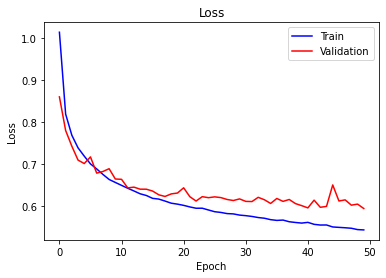

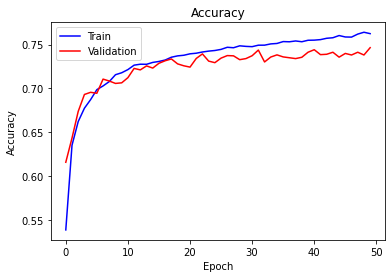

In [15]:
# Defining a function for plotting training and validation learning curves
import matplotlib.pyplot as plt
def plot_history(history):
	  # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
  
plot_history(base_history)